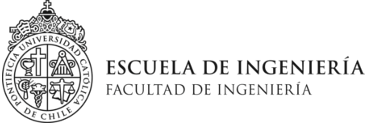

# **➼ Enrique Andres Rojas Alvarez**







In [ ]:
#########################################################################################################################################################################################################################################################################
#Librerias
#########################################################################################################################################################################################################################################################################
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import glob
from numpy import *
from skimage.transform import radon, rescale, iradon, iradon_sart,rotate
from matplotlib import animation
from IPython.display import HTML
from scipy.signal import hilbert, chirp
#########################################################################################################################################################################################################################################################################


## **➼ Codigo Preguna N°1**


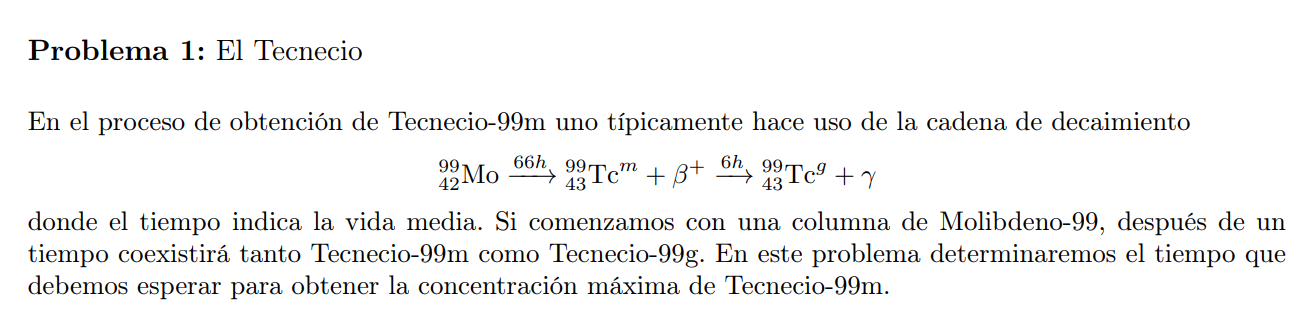

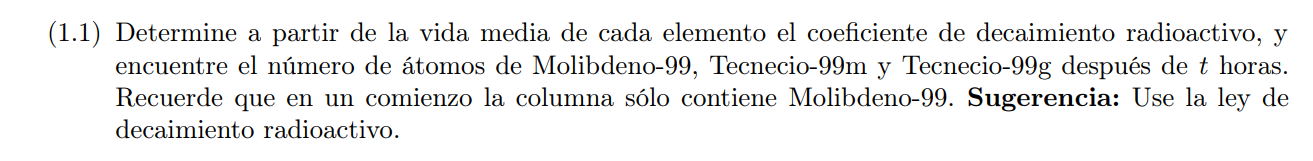

###**1.1**

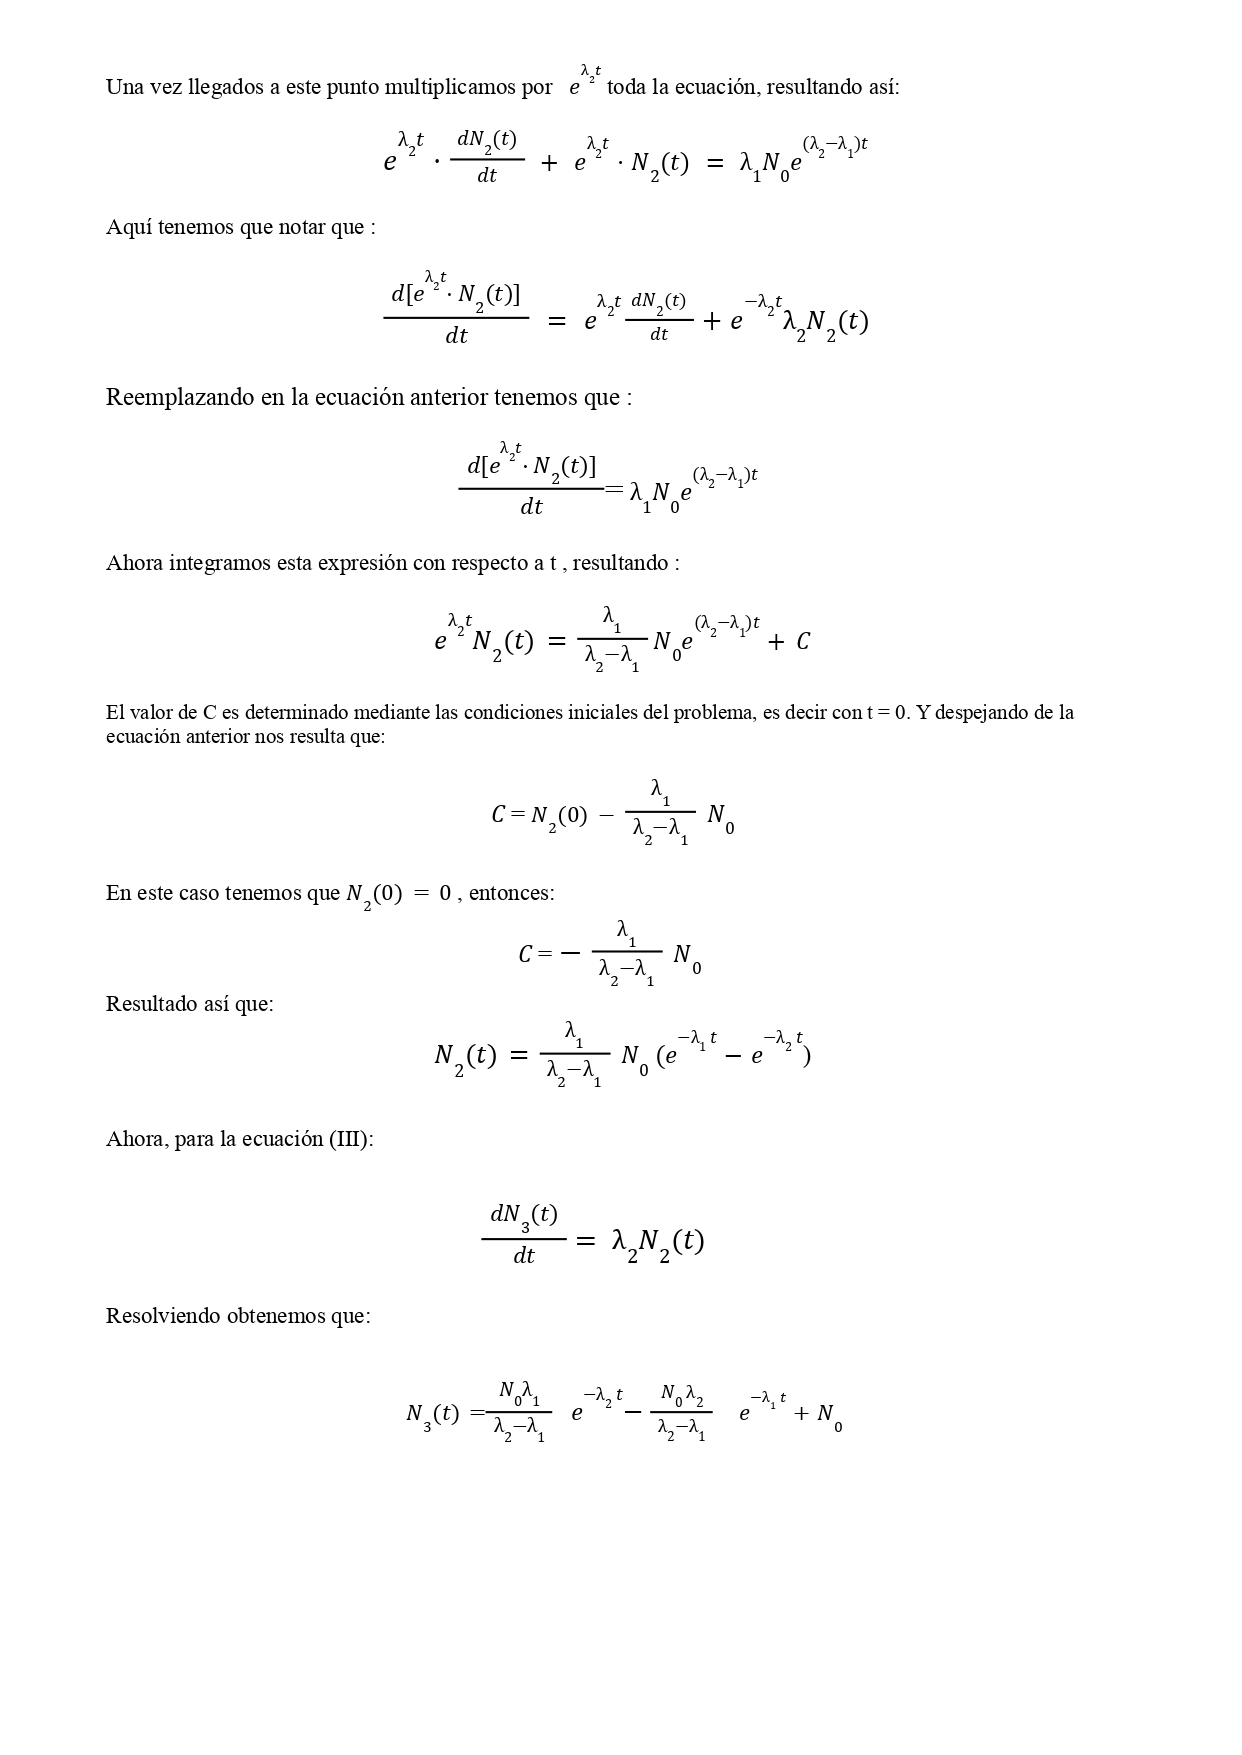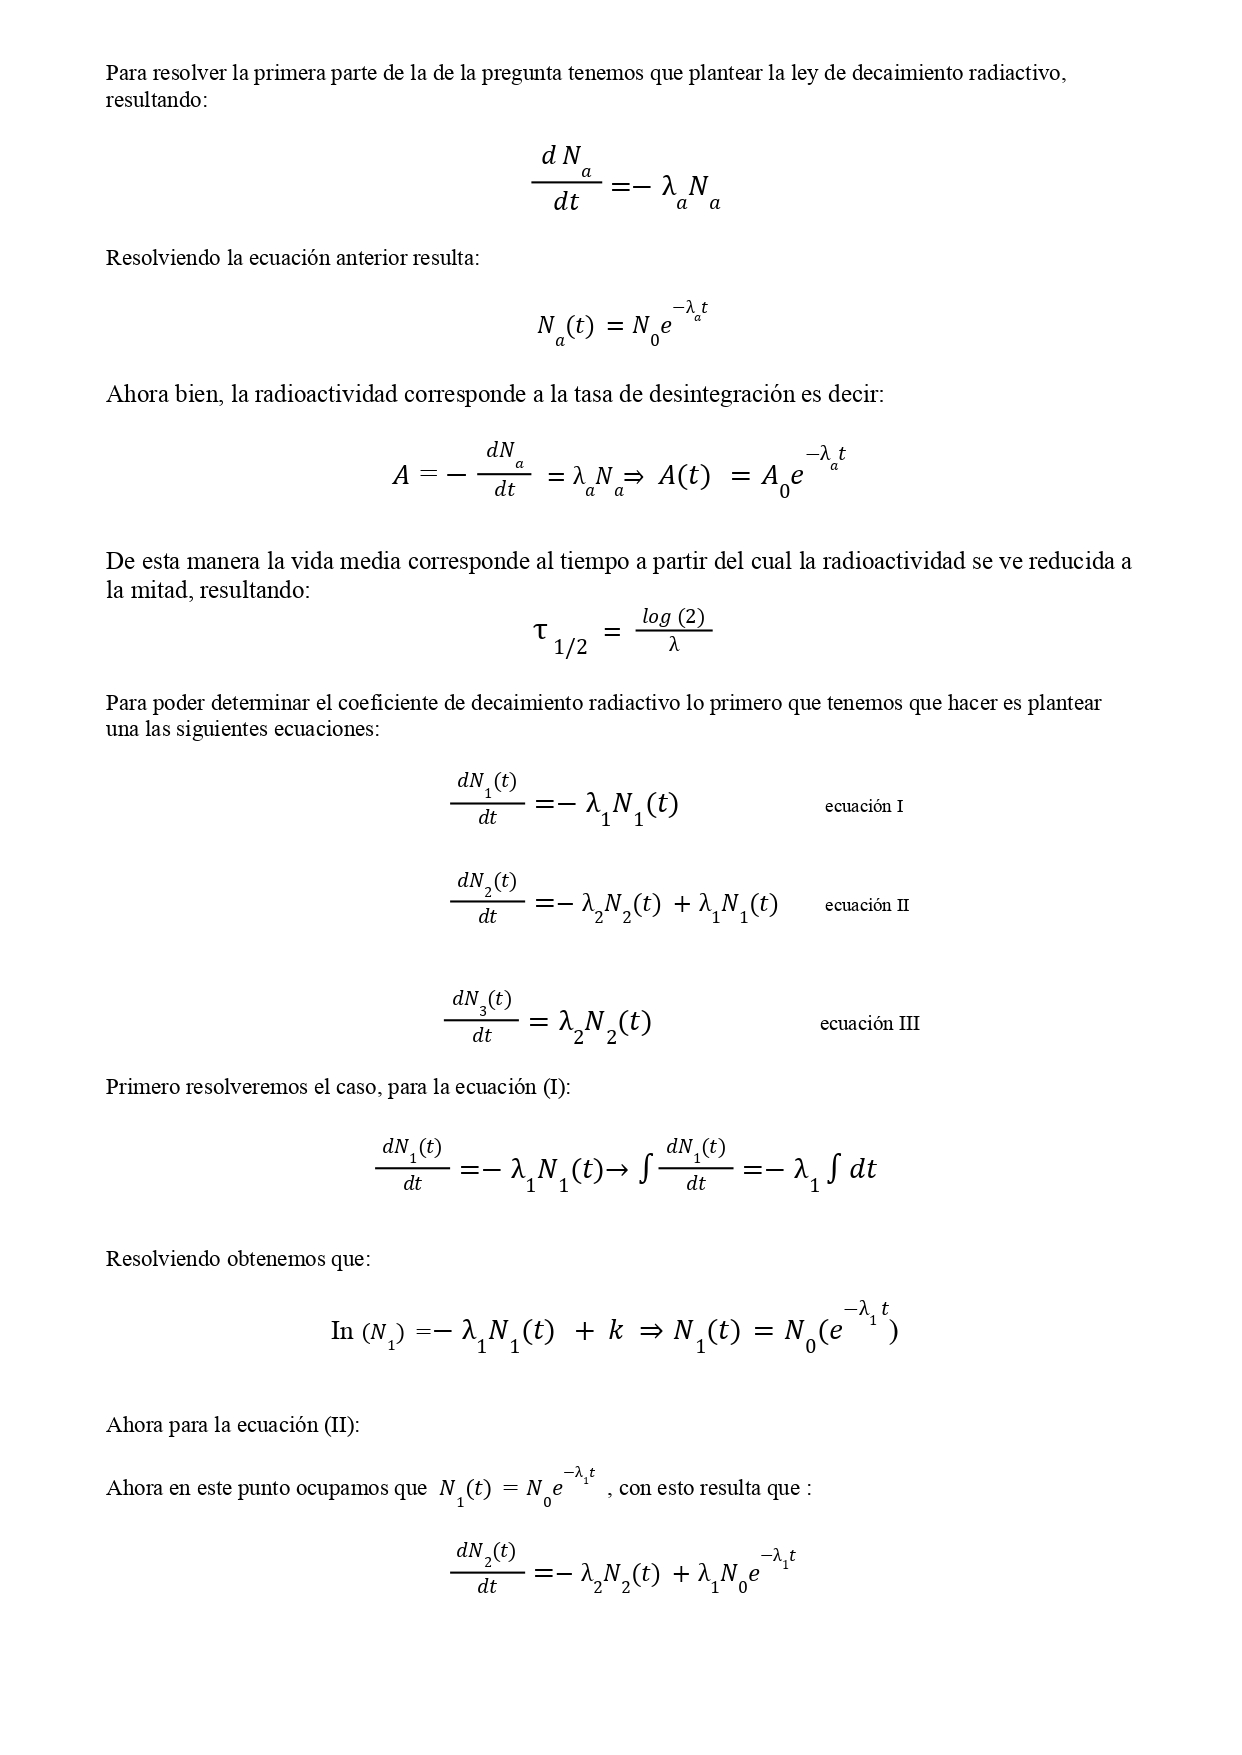

* *Cita https://indico.cern.ch/event/145296/contributions/1381099/attachments/136884/194183/lecture15.pdf*

###**1.2**

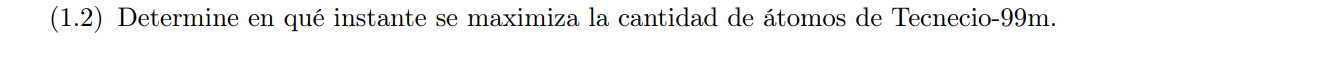

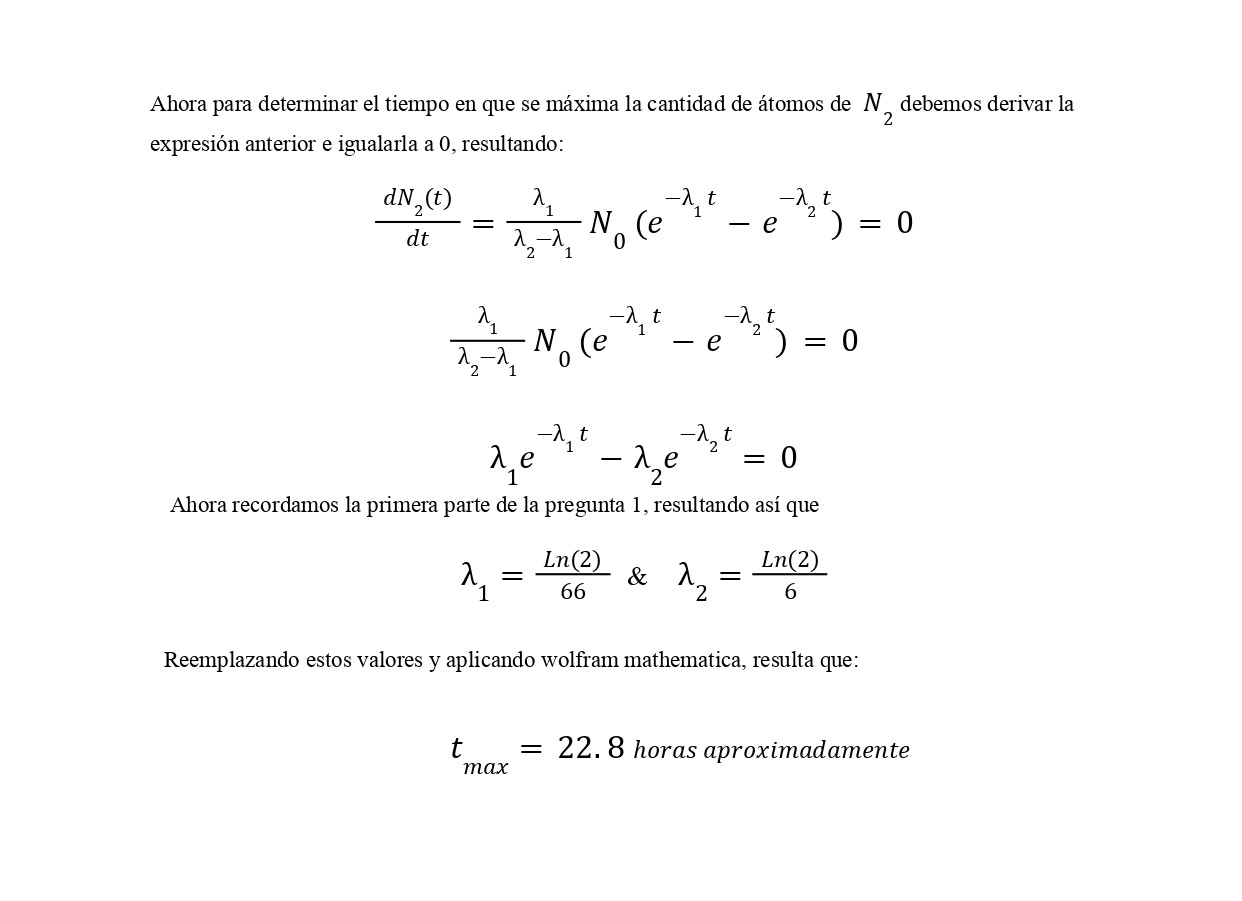

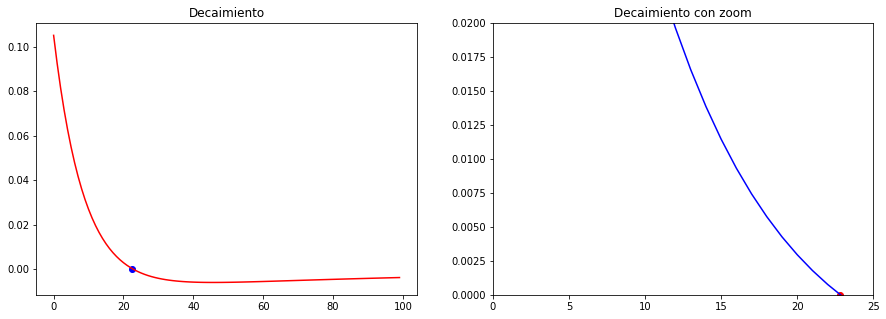

In [ ]:
#########################################################################################################################################################################################################################################################################
def ec(t):
  A=np.log(2)/66
  B=np.log(2)/6

  return  B*np.exp(-B*t) - A*np.exp(-A*t)
X=[]
Y=[]
for i in range(100):
  X.append(i)
for i in X:
  Y.append(ec(i))
#########################################################################################################################################################################################################################################################################
#Graficos
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title(f"Decaimiento")
plt.plot(22.4,0, "o",color="blue")
plt.plot(X,Y,color="red")
#########################################################################################################################################################################################################################################################################
plt.subplot(1, 2, 2)
plt.title(f"Decaimiento con zoom")
plt.ylim(0,0.02)
plt.xlim(0,25)
plt.plot(22.8,0, "o",color="Red")
plt.plot(X,Y,color="Blue")
#########################################################################################################################################################################################################################################################################
plt.show()
#########################################################################################################################################################################################################################################################################



## **➼ Codigo Preguna N°2**


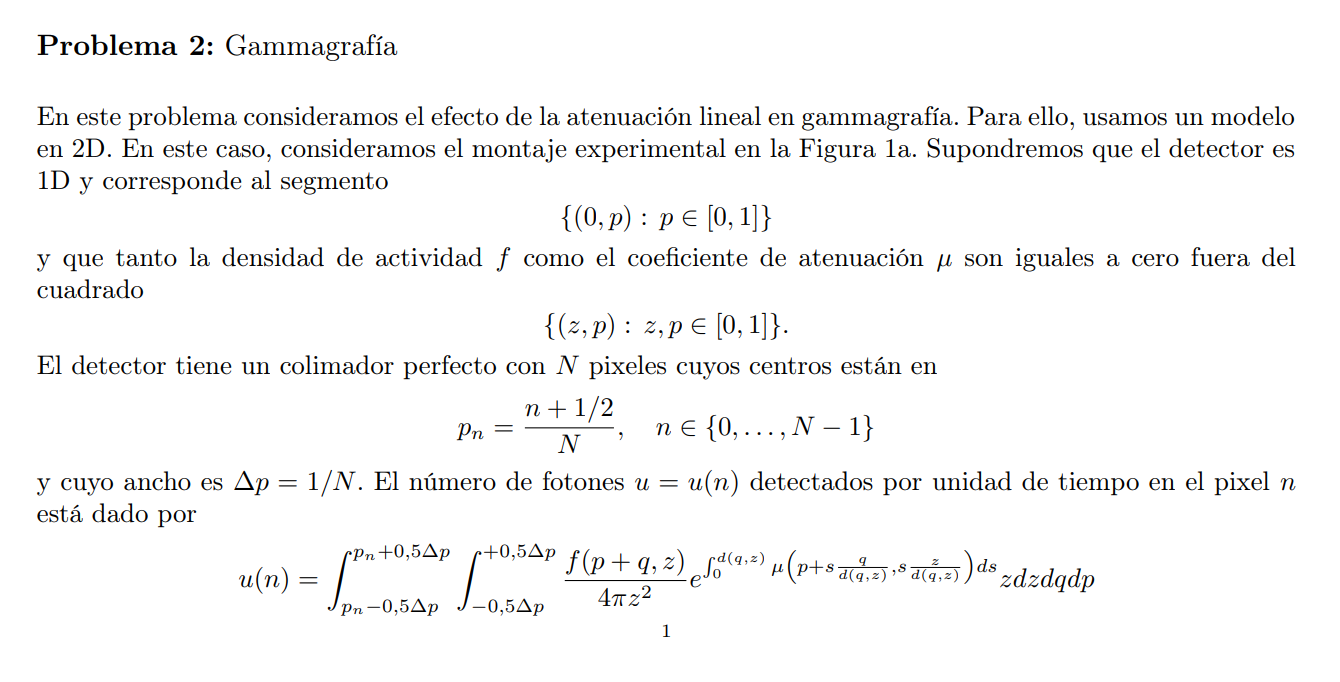

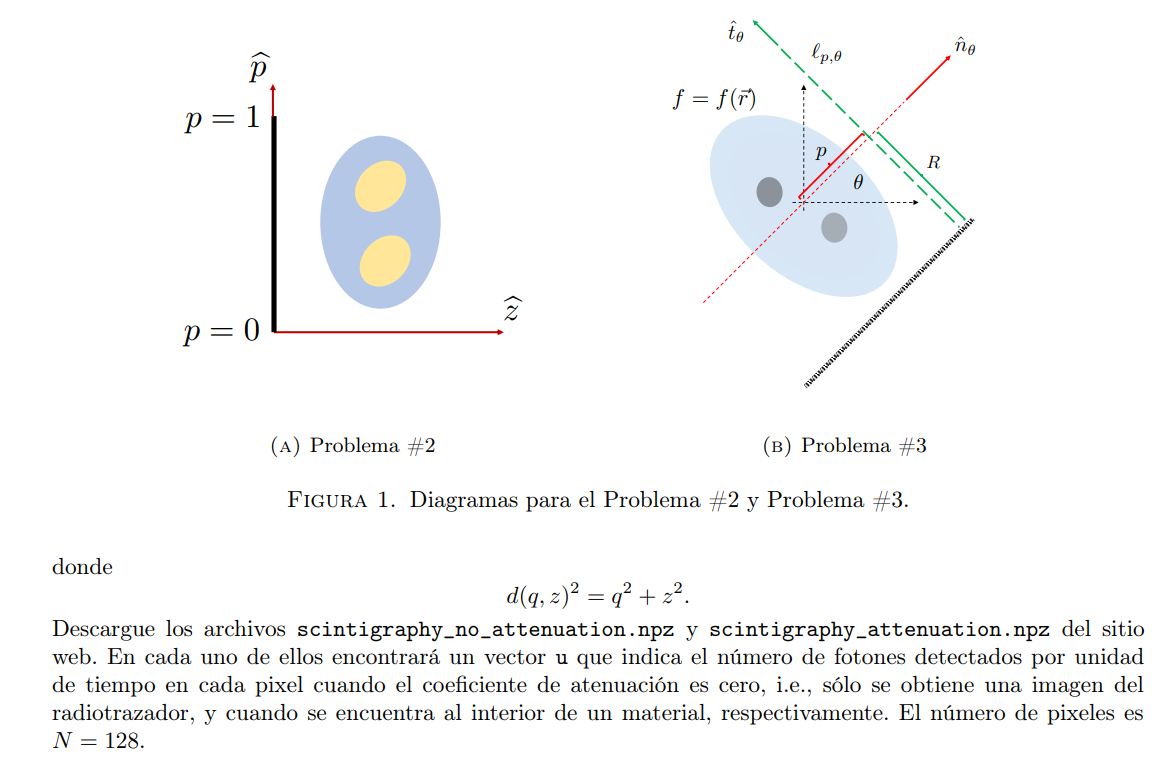

###**2.1**

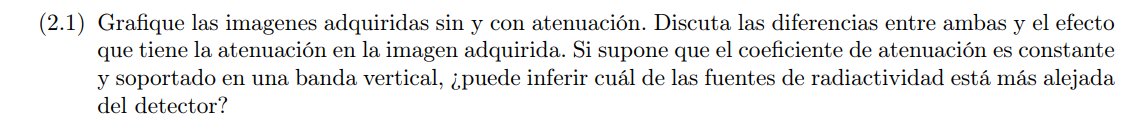

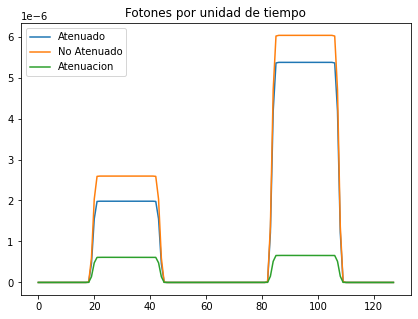

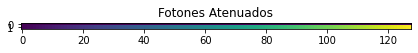

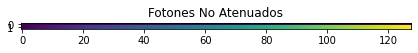

In [ ]:
#########################################################################################################################################################################################################################################################################
datos_A= np.load('scintigraphy_attenuation.npz', allow_pickle=True)
datos_NA= np.load('scintigraphy_no_attenuation.npz', allow_pickle=True)
#########################################################################################################################################################################################################################################################################
u_a=datos_A["u"]
u_na=datos_NA["u"]
plt.figure(figsize=(7, 5))
plt.plot(u_a)
plt.plot(u_na)
plt.plot(u_na-u_a)
plt.title(f"Fotones por unidad de tiempo")
plt.legend(["Atenuado","No Atenuado","Atenuacion"]) 
plt.show()
#########################################################################################################################################################################################################################################################################
N = 128
p = np.linspace(0, 1,N)
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(7, 5))
plt.title(f"Fotones Atenuados")
plt.imshow((u_a,p),vmin=0,vmax=1)
plt.show()
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(7, 5))
plt.title(f"Fotones No Atenuados")
plt.imshow((u_na,p),vmin=0,vmax=1)
plt.show()
#########################################################################################################################################################################################################################################################################

#### Sin conocer el coeficiente de atenuacion es dificil detectar cual se encuentra mas lejano dado a que no podemos recontruir la señal no atenuada con la finalidad de sabes si estaba mas lejana o cercana al detector. Pero si  ocupamos la informacion de la pregunta 2.2 en la cual estimamos el coeficiente de atenuacion podemos llegar a intuir que la primera señal es la cual posee una distancia mayor al detector por esto mismo no basta solo con una correcion del coeficiente de atenuacion para que esta coinsida con los valores de la señal no atenuada. 

###**2.2**

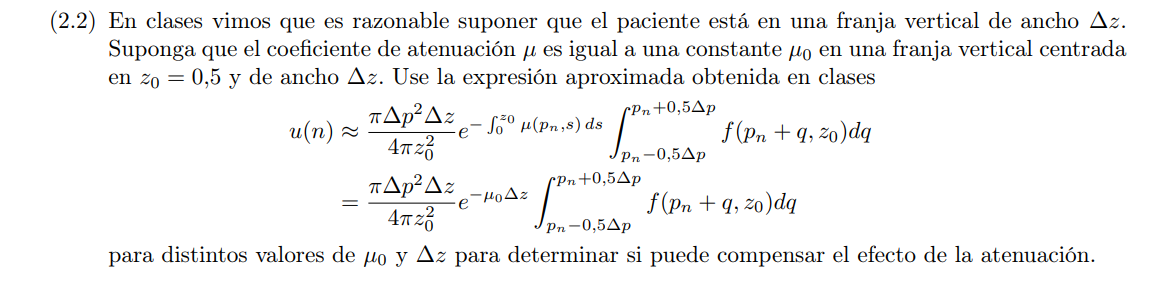

0.7637508141449326


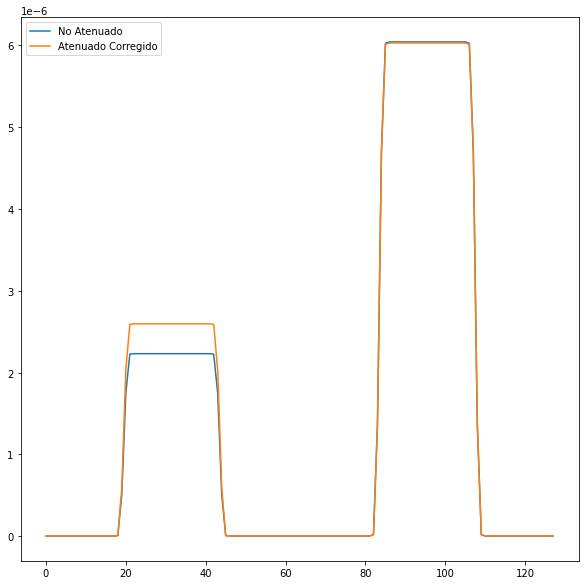

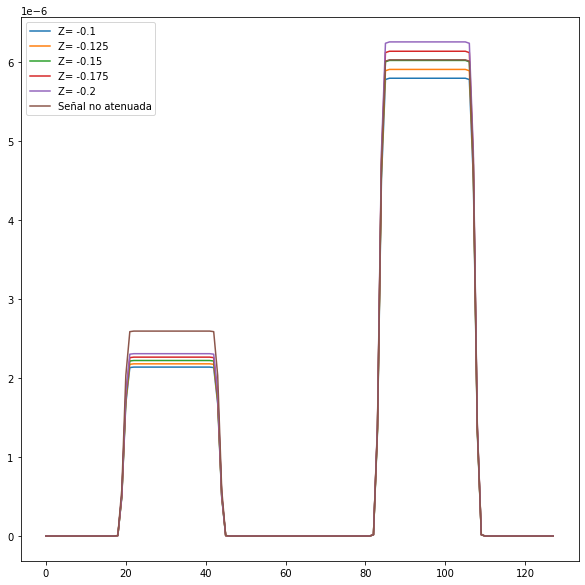

In [ ]:
mu=(u_a[30]/u_na[30]) #lo sacamos del analisis grafico hecho en la parte anterior
print(mu)
z0= np.linspace(-0.1,-0.2,5)

#ecuacion para Z0
mu=0.7637508141449326
plt.figure(figsize=(10, 10))
z=-0.15440

u_ac=u_a*np.exp(-mu*z)
plt.plot(u_ac)
plt.plot(u_na)
plt.legend(["Atenuado Corregido","No Atenuado"]) 
plt.show()


plt.figure(figsize=(10, 10))
for i in z0:
  u_ac=u_a*np.exp(-mu*i)
  plt.plot(u_ac, label = f'Z= {round(i, 3)}')

plt.plot(u_na,label="Señal no atenuada")
plt.legend() 
plt.show()



####Como podemos apreciar no se puede compenzar por completo el efecto de la atenuacion debido a que una de las 2 señales no esta solamente afecta por el coeficiente de atenuacion, sino que tambien se encuentra alejada del detector por lo cual no se puede correguir. En este caso resulta ser la primera señal la cual posee una intencidad mas baja 

## **➼ Codigo Preguna N°3**

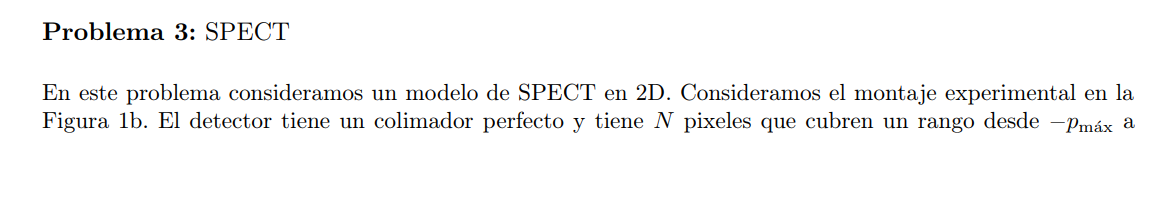

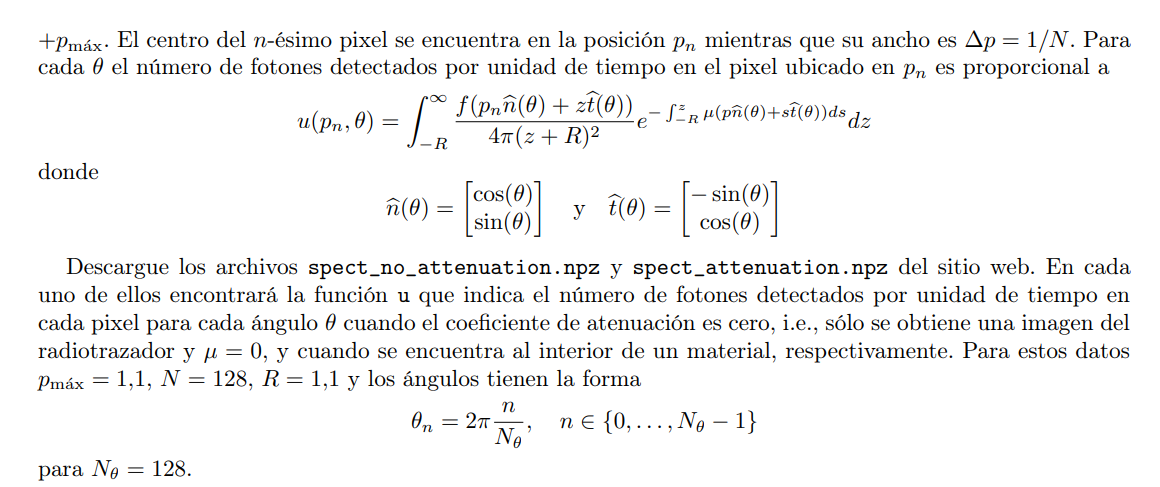


###**3.1**

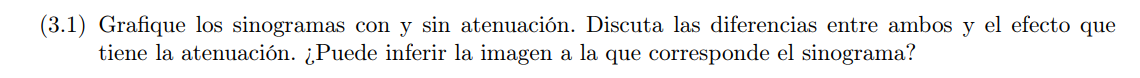

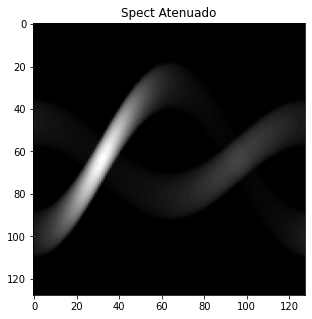

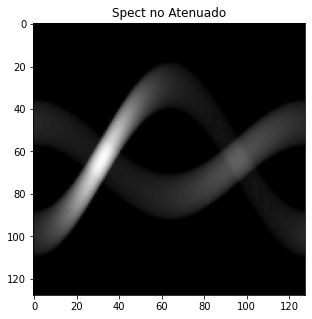

In [ ]:
#########################################################################################################################################################################################################################################################################
datos_A= np.load('spect_attenuation.npz', allow_pickle=True)
datos_NA= np.load('spect_no_attenuation.npz', allow_pickle=True)
#########################################################################################################################################################################################################################################################################
u_a=datos_A["u"]
u_na=datos_NA["u"]
#########################################################################################################################################################################################################################################################################
N = 128
p = np.linspace(0,360,N)
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(10, 5))
plt.title(f"Spect Atenuado")
plt.imshow(u_a, cmap='gray')
plt.show()
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(10, 5))
plt.title(f"Spect no Atenuado")
plt.imshow(u_na, cmap='gray')
plt.show()

#### Recordando la tarea pasada podemos llegar a pensar que son 2 circulos desplazados, dado a que se puede llegar a ver como las sinusoidales se superponen armónicamente, aunque podemos intuir que la imagen tiene bastante ruido debido a todas las distorsiones que presenta el sinograma 

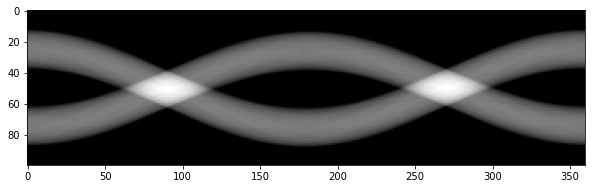

#### Es muy facil reconocer que la diferencia entre ambas imagenes, dado a que esta recae en la  intencidad que posee cada una de las señales, dado a que podemos evidenciar un menor valor de esta para el caso de la imagen atenuada con respecto a la señal sin atenuar 

###**3.2**

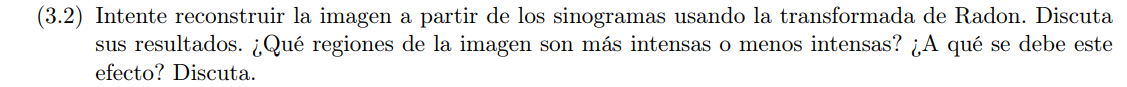

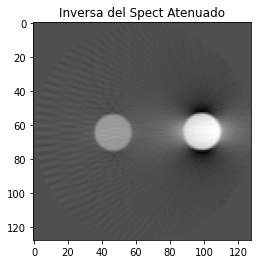

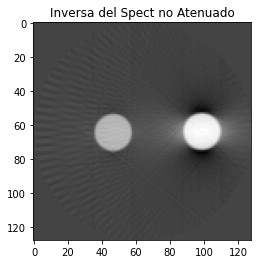

In [ ]:
#########################################################################################################################################################################################################################################################################
N = 128
p = np.linspace(0,360,N)
#########################################################################################################################################################################################################################################################################
sinogram_a=iradon(u_a,theta= p)
plt.title(f"Inversa del Spect Atenuado")
plt.imshow(sinogram_a, cmap='gray')
plt.show()
#########################################################################################################################################################################################################################################################################
sinogram_na= iradon(u_na,theta= p)
plt.title(f"Inversa del Spect no Atenuado")
plt.imshow(sinogram_na, cmap='gray')
plt.show()
#########################################################################################################################################################################################################################################################################   


#### Lo primero que podemos ver es que se forman artefactos transversalmente en cada uno de los círculos, aunque podemos notar de manera gráfica que el círculo de la derecha presenta notorias perturbaciones en sus polos. 
 
#### Esto se debe a que principalmente a como vimos en el sinograma, que estos puntos poseen una mayor intensidad  y no poseen un valor homogéneo a lo largo de la sinusoidal, por lo cual los polos de la imagen se ven afectados, si la intensidad hubiese sido cte, no se presentan estos artefactos en los polos.


###**3.3**

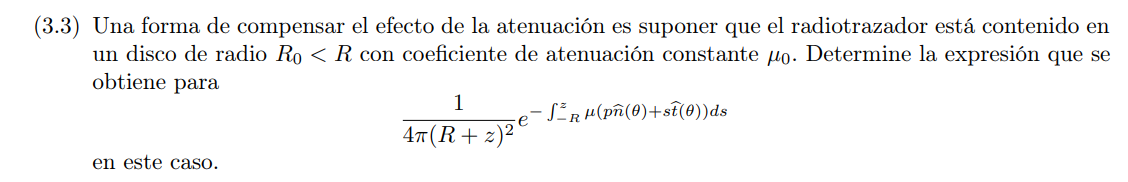

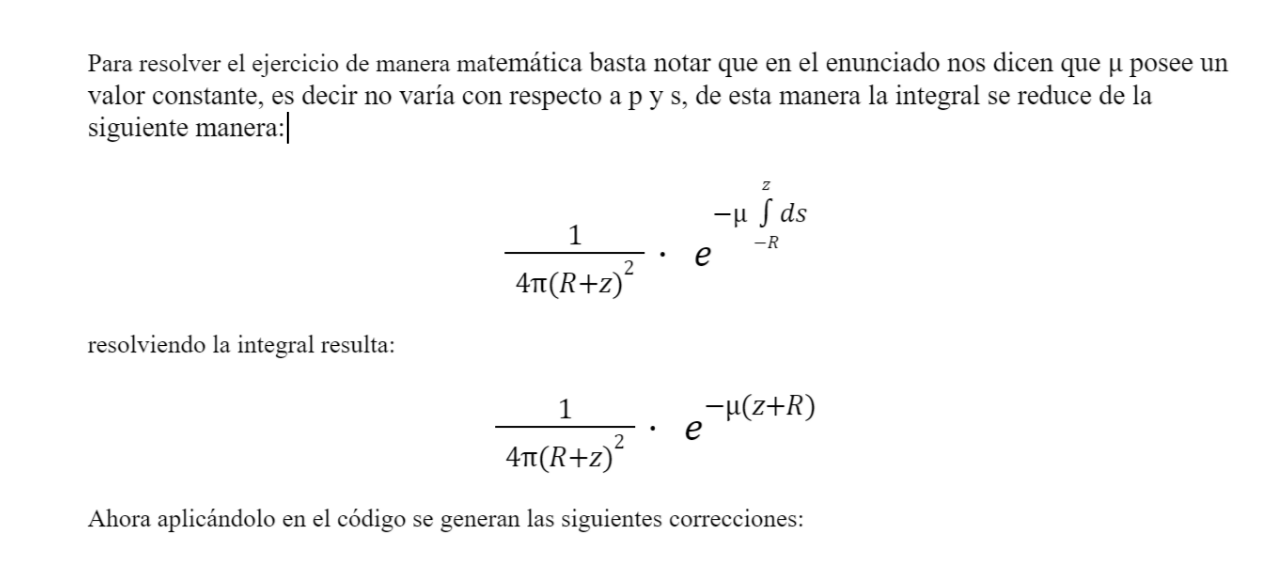

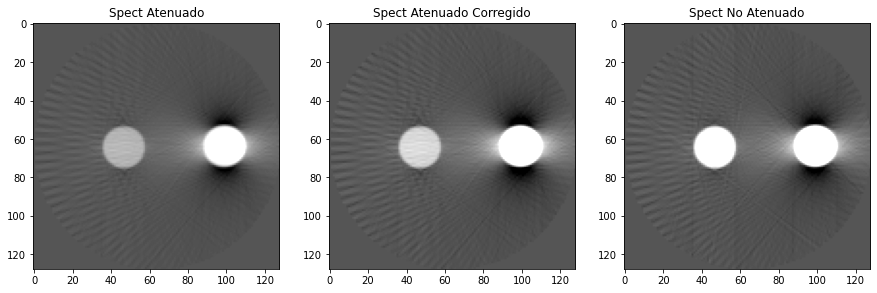

In [ ]:
#########################################################################################################################################################################################################################################################################   
u_a=datos_A["u"]
u_na=datos_NA["u"]
#########################################################################################################################################################################################################################################################################   
lista_mu=[]
c1=0
c2=0
for i in range(128):
  for e in range(128):
    if u_a[i][e]>0 and u_na[i][e]:
      lista_mu.append(u_a[i][e]/u_na[i][e])
  if c1<max(u_a[i]):
    c1=max(u_a[i])
  else:
    pass
  if c2<max(u_na[i]):
    c2=max(u_na[i])
  else:
    pass
#########################################################################################################################################################################################################################################################################   
#ecuacion para Z0
mu=min(lista_mu)
r0=64
#para obtener este valor lo que hice fue resolver la siguiente ecuacion muy simple c1=c2*np.exp(-mu*(z+r0)) con los valores de c1,c2 y r0 conocidos
#compare c1 con c2 dado a que asumi que el maximo en cada una de las matrices se encontraba en el mismo pixel (ubicacion)
z=-65.39372 
u_ac=u_a*np.exp(-mu*(z+r0))
#########################################################################################################################################################################################################################################################################   
#Graficos
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 2)
plt.title(f"Spect Atenuado Corregido")
plt.imshow(iradon(u_ac,theta= p), cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.subplot(1, 3, 3)
plt.title(f"Spect No Atenuado")
plt.imshow(iradon(u_na,theta= p), cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.subplot(1, 3, 1)
plt.title(f"Spect Atenuado")
plt.imshow(iradon(u_a,theta= p), cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.show()
#########################################################################################################################################################################################################################################################################   



###**3.4**

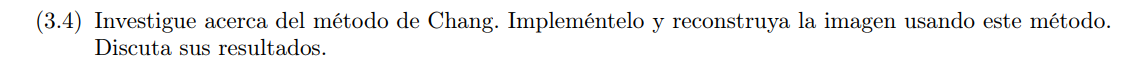

#### *El método constituye una aproximación que simplemente calcula la atenuación promedio de los fotones que provienen de cada punto del cuerpo a diferentes  ángulos. El método involucra una simple multiplicación por un factor de corrección en cada punto, efectuando una leve sobre-corrección aún usando un coeficiente de atenuación de haz ancho.*

####*Al realizar la corrección de atenuación de Chang se debe tomar en cuenta lo siguiente:* 

* *Si no se ha efectuado corrección de radiación dispersa, utilizar el coeficiente efectivo de  atenuación apropiado*

* *Seleccionar un contorno correcto para el sector del cuerpo que será objeto de corrección. El método asume un coeficiente constante de atenuación para todos los  tejidos, pero debe ser seleccionado un contorno adecuado del cuerpo.*

##### *Cita: Fundamentos de SPECT*

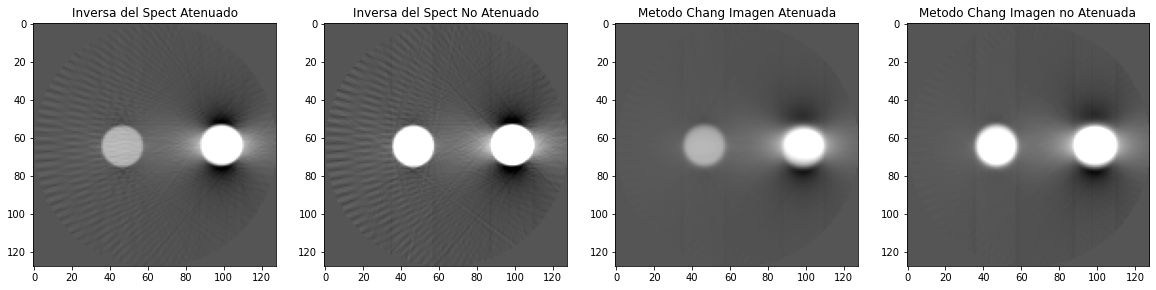

In [ ]:
#########################################################################################################################################################################################################################################################################
N = 128
p = np.linspace(0,360,N)
mu=min(lista_mu)
z=-66.39372
r0=64
#########################################################################################################################################################################################################################################################################
sinogram_a=iradon(u_a,theta= p)
#########################################################################################################################################################################################################################################################################   
x,y=u_a.shape
c=0
cu_a=u_a.copy()
for i in range(x-1):
  for e in range(y-1):
    cu_a[i][e]=(cu_a[i][e-1]+cu_a[i][e]+cu_a[i][e+1]+cu_a[i+1][e+1]+cu_a[i+1][e]+cu_a[i][e-1]+cu_a[i-1][e-1]+cu_a[i-1][e]+cu_a[i-1][e+1])/9
    
cu_a*np.exp(-mu*(z+r0))
#########################################################################################################################################################################################################################################################################   
sinogram_ca= iradon(cu_a,theta= p)
#########################################################################################################################################################################################################################################################################    
x,y=u_na.shape
c=0
cu_na=u_na.copy()
for i in range(x-1):
  for e in range(y-1):
    cu_na[i][e]=(cu_na[i][e-1]+cu_na[i][e]+cu_na[i][e+1]+cu_na[i+1][e+1]+cu_na[i+1][e]+cu_na[i][e-1]+cu_na[i-1][e-1]+cu_na[i-1][e]+cu_na[i-1][e+1])/9
#########################################################################################################################################################################################################################################################################    
sinogram_cna= iradon(cu_na,theta= p)
#########################################################################################################################################################################################################################################################################    
sinogram_na= iradon(u_na,theta= p)
#########################################################################################################################################################################################################################################################################    
#Graficos
plt.figure(figsize=(20,15))
plt.subplot(1, 4, 2)
plt.title(f"Inversa del Spect No Atenuado")
plt.imshow(sinogram_na, cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.subplot(1, 4, 1)
plt.title(f"Inversa del Spect Atenuado")
plt.imshow(sinogram_a, cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.subplot(1, 4, 3)
plt.title(f"Metodo Chang Imagen Atenuada")
plt.imshow(sinogram_ca, cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.subplot(1, 4,4)
plt.title(f"Metodo Chang Imagen no Atenuada")
plt.imshow(sinogram_cna, cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.show()
#########################################################################################################################################################################################################################################################################   



### **(EXTRA)** 
#####Esta parte la hice cara entender mejor como funcionaba el Metodo de Chang



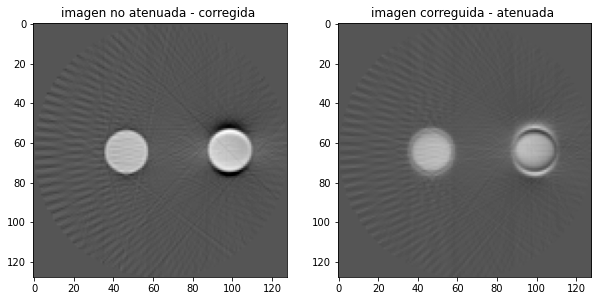

In [ ]:
#########################################################################################################################################################################################################################################################################
N = 128
p = np.linspace(0,360,N)
mu=min(lista_mu)
z=-65.39372
r0=64
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(10,10))
#########################################################################################################################################################################################################################################################################
sinogram_a=iradon(u_a,theta= p)
#########################################################################################################################################################################################################################################################################   
x,y=u_a.shape
c=0
cu_a=u_a.copy()
for i in range(x-1):
  for e in range(y-1):
    cu_a[i][e]=(cu_a[i][e-1]+cu_a[i][e]+cu_a[i][e+1]+cu_a[i+1][e+1]+cu_a[i+1][e]+cu_a[i][e-1]+cu_a[i-1][e-1]+cu_a[i-1][e]+cu_a[i-1][e+1])/9
    
cu_a*np.exp(-mu*(z+r0))
#########################################################################################################################################################################################################################################################################   
sinogram_ca= iradon(cu_a,theta= p)
sinogram_na= iradon(u_na,theta= p)
#########################################################################################################################################################################################################################################################################    
plt.subplot(1, 2, 1)
plt.title(f"imagen no atenuada - corregida ")
plt.imshow(sinogram_na -sinogram_ca, cmap='gray',vmin=-0.0003,vmax=0.0006)
#########################################################################################################################################################################################################################################################################
x,y=u_na.shape
c=0
cu_na=u_na.copy()
for i in range(x-1):
  for e in range(y-1):
    cu_na[i][e]=(cu_na[i][e-1]+cu_na[i][e]+cu_na[i][e+1]+cu_na[i+1][e+1]+cu_na[i+1][e]+cu_na[i][e-1]+cu_na[i-1][e-1]+cu_na[i-1][e]+cu_na[i-1][e+1])/9
cu_na*np.exp(-mu*(z+r0))
#########################################################################################################################################################################################################################################################################    
sinogram_ca= iradon(cu_na,theta= p)
#########################################################################################################################################################################################################################################################################    
plt.subplot(1, 2, 2)
plt.title(f"imagen correguida - atenuada ")
plt.imshow(sinogram_ca- sinogram_a, cmap='gray',vmin=-0.0003,vmax=0.0006)
plt.show()
#########################################################################################################################################################################################################################################################################    
